In [1]:
import shap
import pickle
from transformers import AutoTokenizer
import numpy as np
from src.utils import format_fts_for_plotting
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram


/home/james/CodingProjects/TextNTabularExplanations/env/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Scale factor=2

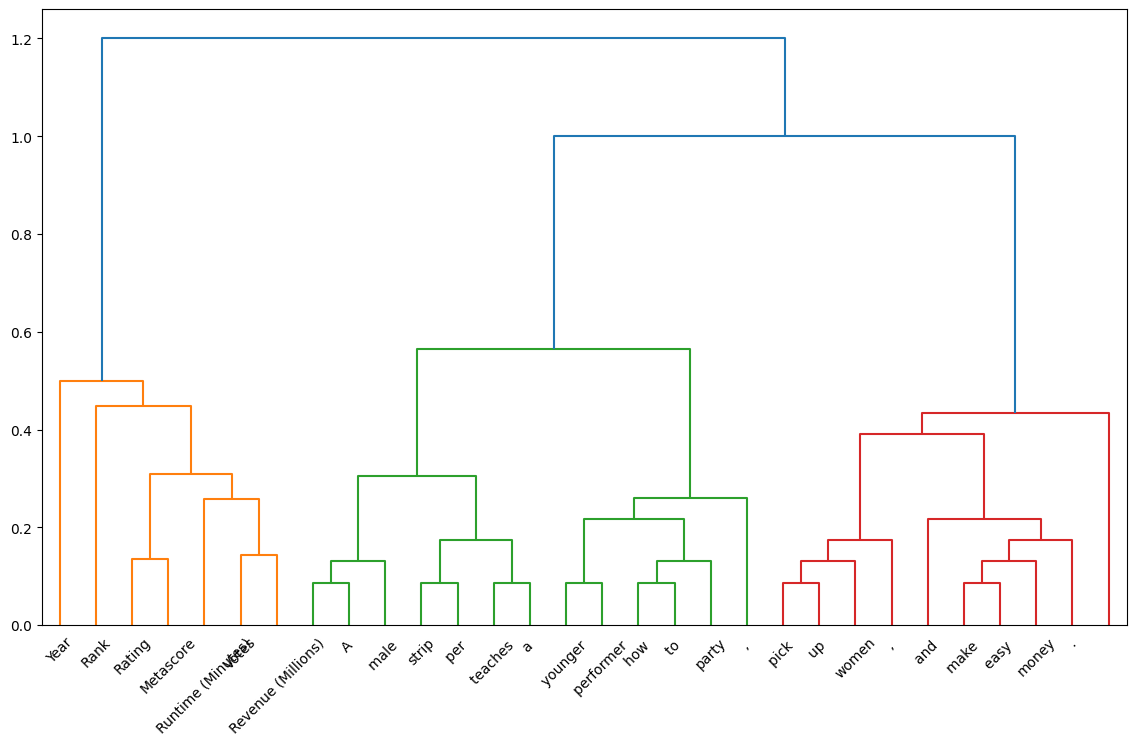

In [5]:
Z_join = np.array(
    [
        [2.0, 5.0, 0.13524777, 2.0],
        [3.0, 4.0, 0.14408858, 2.0],
        [1.0, 31.0, 0.25840533, 3.0],
        [30.0, 32.0, 0.3081487, 5.0],
        [6.0, 33.0, 0.44813263, 6.0],
        [0.0, 34.0, 0.5, 7.0],
        [10.0, 11.0, 0.08695652, 2.0],
        [7.0, 8.0, 0.08695652, 2.0],
        [12.0, 13.0, 0.08695652, 2.0],
        [14.0, 15.0, 0.08695652, 2.0],
        [16.0, 17.0, 0.08695652, 2.0],
        [20.0, 21.0, 0.08695652, 2.0],
        [25.0, 26.0, 0.08695652, 2.0],
        [37.0, 9.0, 0.13043478, 3.0],
        [40.0, 18.0, 0.13043478, 3.0],
        [41.0, 22.0, 0.13043478, 3.0],
        [42.0, 27.0, 0.13043478, 3.0],
        [36.0, 38.0, 0.17391304, 4.0],
        [39.0, 44.0, 0.2173913, 5.0],
        [45.0, 23.0, 0.17391304, 4.0],
        [46.0, 28.0, 0.17391304, 4.0],
        [43.0, 47.0, 0.30434783, 7.0],
        [48.0, 19.0, 0.26086957, 6.0],
        [24.0, 50.0, 0.2173913, 5.0],
        [51.0, 52.0, 0.56521739, 13.0],
        [49.0, 53.0, 0.39130435, 9.0],
        [55.0, 29.0, 0.43478261, 10.0],
        [54.0, 56.0, 1.0, 23.0],
        [35.0, 57.0, 1.2, 30.0],
    ]
)
fig = plt.figure(figsize=(14, 8))
# dn = dendrogram(np.concatenate([Z, C + [6,6,0,6],[[10.0, 11.0, 1.5, 7.0]]]), labels=['s', 'romantic ', 'comedy', 's','Rating', 'Run', 'Votes'])
# , labels=['Rating', 'Run', 'Votes','s', 'romantic ', 'comedy', 's'])
dn = dendrogram(
    Z_join,
    labels=[
        "Year",
        "Runtime (Minutes)",
        "Rating",
        "Votes",
        "Revenue (Millions)",
        "Metascore",
        "Rank",
        "",
        "A ",
        "male ",
        "strip",
        "per ",
        "teaches ",
        "a ",
        "younger ",
        "performer ",
        "how ",
        "to ",
        "party",
        ", ",
        "pick ",
        "up ",
        "women",
        ", ",
        "and ",
        "make ",
        "easy ",
        "money",
        ".",
        "",
    ],
)
plt.show()


## Scale factor=1

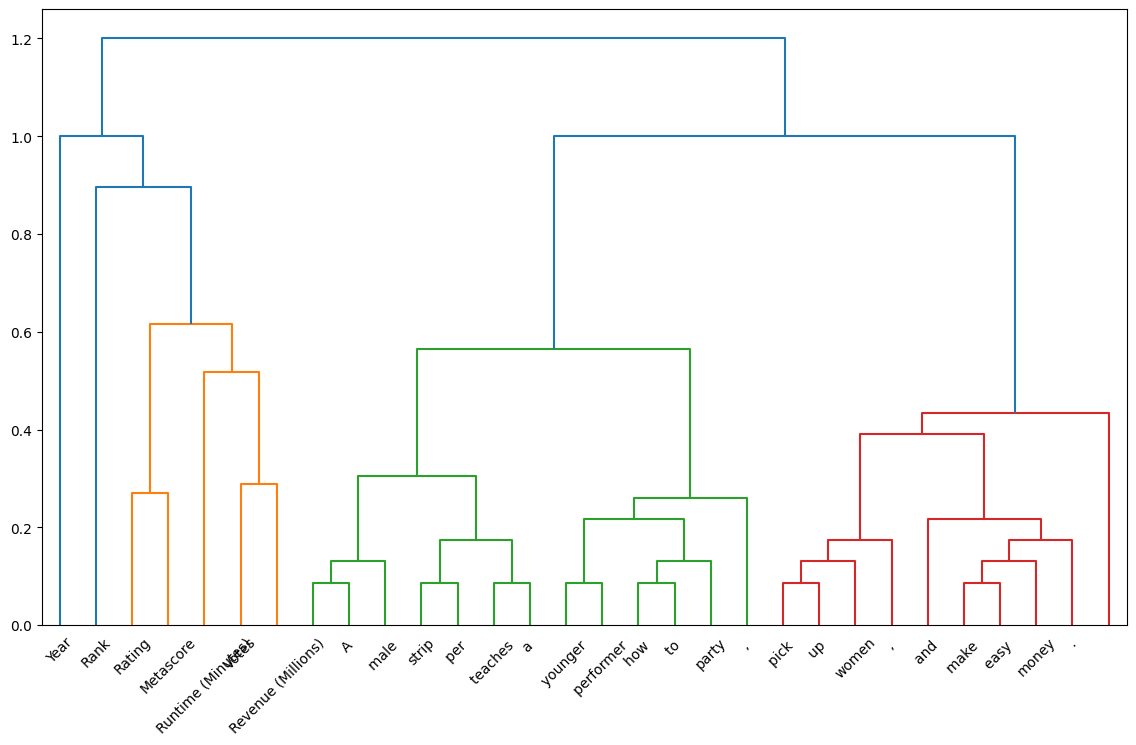

In [6]:
Z_join = np.array(
    [
        [2.0, 5.0, 0.27049554, 2.0],
        [3.0, 4.0, 0.28817716, 2.0],
        [1.0, 31.0, 0.51681066, 3.0],
        [30.0, 32.0, 0.6162974, 5.0],
        [6.0, 33.0, 0.89626526, 6.0],
        [0.0, 34.0, 1.0, 7.0],
        [10.0, 11.0, 0.08695652, 2.0],
        [7.0, 8.0, 0.08695652, 2.0],
        [12.0, 13.0, 0.08695652, 2.0],
        [14.0, 15.0, 0.08695652, 2.0],
        [16.0, 17.0, 0.08695652, 2.0],
        [20.0, 21.0, 0.08695652, 2.0],
        [25.0, 26.0, 0.08695652, 2.0],
        [37.0, 9.0, 0.13043478, 3.0],
        [40.0, 18.0, 0.13043478, 3.0],
        [41.0, 22.0, 0.13043478, 3.0],
        [42.0, 27.0, 0.13043478, 3.0],
        [36.0, 38.0, 0.17391304, 4.0],
        [39.0, 44.0, 0.2173913, 5.0],
        [45.0, 23.0, 0.17391304, 4.0],
        [46.0, 28.0, 0.17391304, 4.0],
        [43.0, 47.0, 0.30434783, 7.0],
        [48.0, 19.0, 0.26086957, 6.0],
        [24.0, 50.0, 0.2173913, 5.0],
        [51.0, 52.0, 0.56521739, 13.0],
        [49.0, 53.0, 0.39130435, 9.0],
        [55.0, 29.0, 0.43478261, 10.0],
        [54.0, 56.0, 1.0, 23.0],
        [35.0, 57.0, 1.2, 30.0],
    ]
)
fig = plt.figure(figsize=(14, 8))
# dn = dendrogram(np.concatenate([Z, C + [6,6,0,6],[[10.0, 11.0, 1.5, 7.0]]]), labels=['s', 'romantic ', 'comedy', 's','Rating', 'Run', 'Votes'])
# , labels=['Rating', 'Run', 'Votes','s', 'romantic ', 'comedy', 's'])
dn = dendrogram(
    Z_join,
    labels=[
        "Year",
        "Runtime (Minutes)",
        "Rating",
        "Votes",
        "Revenue (Millions)",
        "Metascore",
        "Rank",
        "",
        "A ",
        "male ",
        "strip",
        "per ",
        "teaches ",
        "a ",
        "younger ",
        "performer ",
        "how ",
        "to ",
        "party",
        ", ",
        "pick ",
        "up ",
        "women",
        ", ",
        "and ",
        "make ",
        "easy ",
        "money",
        ".",
        "",
    ],
)
plt.show()


In [1]:
idxs = [
    i
    for i, x in enumerate(
        [
            "Year",
            "Runtime (Minutes)",
            "Rating",
            "Votes",
            "Revenue (Millions)",
            "Metascore",
            "Rank",
            "Description",
        ]
    )
]

In [2]:
idxs


[0, 1, 2, 3, 4, 5, 6, 7]